In [81]:
"""
IRIS ML PROJECT — FULL PIPELINE
--------------------------------
1. Problem Definition
2. Load Data
3. Basic EDA
4. Advance EDA (visual)
5. Data Cleaning
6. Label Encoding
7. Train-Test Split
8. Model Training (4 Models)
9. Model Comparison
10. Feature Importance
11. Final Prediction Function (User Input)
12. Project Insights
"""

'\nIRIS ML PROJECT — FULL PIPELINE\n--------------------------------\n1. Problem Definition\n2. Load Data\n3. Basic EDA\n4. Advance EDA (visual)\n5. Data Cleaning\n6. Label Encoding\n7. Train-Test Split\n8. Model Training (4 Models)\n9. Model Comparison\n10. Feature Importance\n11. Final Prediction Function (User Input)\n12. Project Insights\n'

In [82]:
# 1. Problem Definition

"""
Goal:
    Given flower measurements (sepal length, sepal width, petal length, petal width),
    predict the species (Setosa, Versicolor, Virginica).

Type:
    Multiclass Classification (3 classes)

Input Features (X):
    - SepalLengthCm
    - SepalWidthCm
    - PetalLengthCm
    - PetalWidthCm

Target (y):
    Species

Success Metric:
    Accuracy (primary)
    Confusion Matrix + Classification Report (secondary)
"""

'\nGoal:\n    Given flower measurements (sepal length, sepal width, petal length, petal width),\n    predict the species (Setosa, Versicolor, Virginica).\n\nType:\n    Multiclass Classification (3 classes)\n\nInput Features (X):\n    - SepalLengthCm\n    - SepalWidthCm\n    - PetalLengthCm\n    - PetalWidthCm\n\nTarget (y):\n    Species\n\nSuccess Metric:\n    Accuracy (primary)\n    Confusion Matrix + Classification Report (secondary)\n'

In [83]:
# 2. Load Dataset

import pandas as pd

# the notebook runs from the workspace root, so the CSV lives under data/
# original path was incorrect and caused FileNotFoundError

df = pd.read_csv("../data/Iris.csv")  # Load the CSV file

df.head()                     # Show first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
# 3. Basic EDA

df.shape               # rows, columns
df.columns             # column names
df.info()              # data types, null values
df.describe()          # statistical summary

df['Species'].value_counts()  # class distribution

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    str    
dtypes: float64(4), int64(1), str(1)
memory usage: 7.2 KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

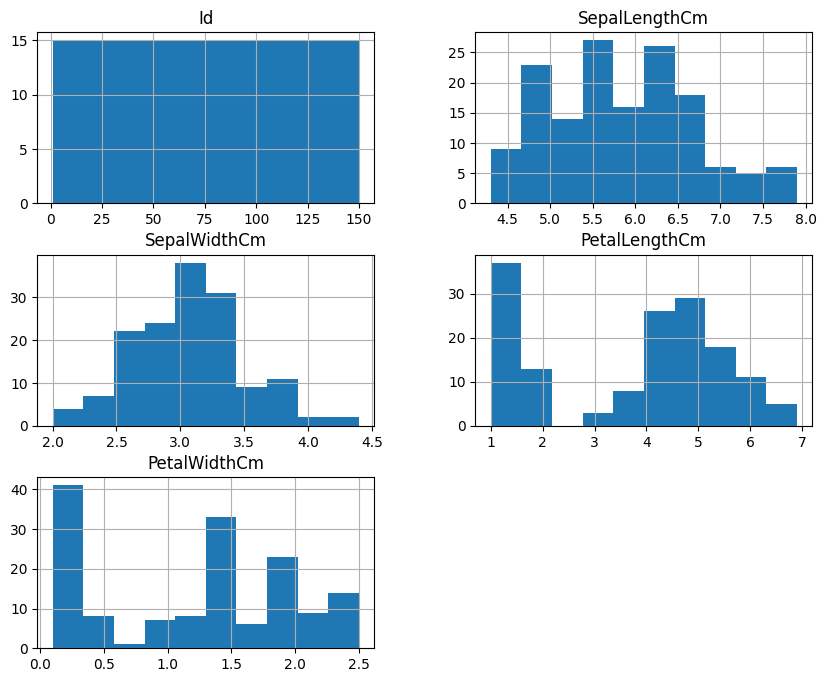

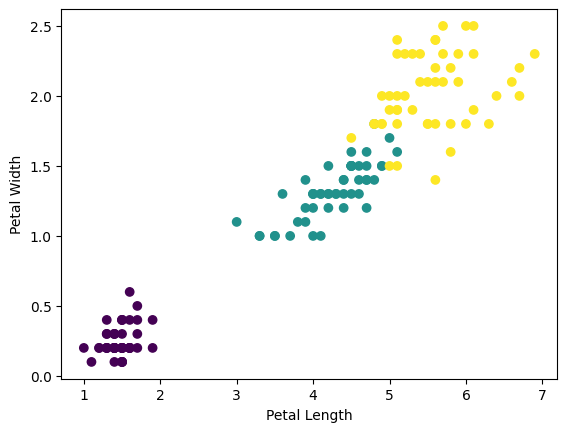

In [85]:
# 4.1 Histograms
import matplotlib.pyplot as plt
df.hist(figsize=(10,8))
plt.show()

# 4.2 Key Scatter Plot
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [ ]:
# 4.3 Pairplot
import seaborn as sns
sns.pairplot(df, hue="Species")

In [ ]:
# 4.4 Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
# 5. Data Cleaning

df = df.drop(columns=['Id'])
df.head()

In [ ]:
# 6. Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['target'] = le.fit_transform(df['Species'])
df = df.drop(columns=['Species'])

df.head()

In [ ]:
# 7. Train-Test Split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 8. Train multiple ML models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 9. Compare accuracy of all models

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# show results dictionary and best model
print(results)
best = max(results, key=results.get)
print("Best model:", best, "with accuracy", results[best])

# print confusion matrix and classification report for the best model

y_pred = models[best].predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# 10. Feature Importance

rf = models["Random Forest"]
importances = rf.feature_importances_

for feat, score in zip(X.columns, importances):
    print(f"{feat}: {score}")

In [ ]:
# Bar plot
plt.bar(X.columns, importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
import pandas as pd

def predict_species(sl, sw, pl, pw):
    feature_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
    
    # Making DataFrame
    sample = pd.DataFrame([[sl, sw, pl, pw]], columns=feature_names)
    
    # Prediction
    pred = models["Random Forest"].predict(sample)[0]
    
    # Maping (Make sure to 'pred' is a Int)
    species_map = {0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica"}

    return species_map.get(pred, pred)

# Now Testing.....  
print(predict_species(5.1, 3.5, 1.4, 0.2))


In [ ]:
"""
INSIGHTS:

1. Petal length & petal width are strongest features.
2. Dataset is clean & perfectly balanced.
3. Best performing model usually:
      RandomForest or SVM (95%–98% accuracy)
4. Logistic Regression also high performing due to clean dataset.
5. Iris is a perfect beginner dataset to understand ML end-to-end.
6. You now have:
    - Full pipeline
    - EDA
    - Model comparison
    - Feature importance
    - Prediction function
    - Professional project structure
"""